In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


df = pd.read_csv('data.csv')
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [14]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [33]:
print(df.columns)
df.columns = ['Region', 'Date', 'Frequency', 'Unemployment Rate',
       'Employed', 'Labour Participation Rate',
       'Area']

Index(['Region', 'Date', 'Frequency', 'Unemployment Rate', 'Employed',
       'Labour Participation Rate ', 'Area'],
      dtype='object')


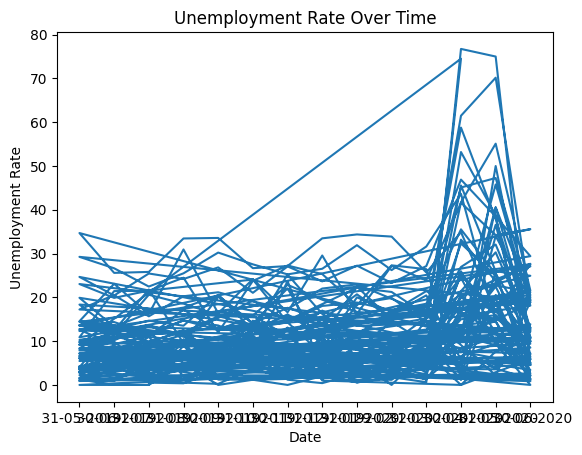

In [28]:
plt.plot(df['Date'], df['Unemployment Rate'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

# Perform other EDA tasks like checking for seasonality, trends, correlations, etc.


In [34]:
X = df[['Employed', 'Labour Participation Rate']]
y = df['Unemployment Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 139.07514553297295


In [36]:
mae = np.mean(np.abs(predictions - y_test))
print("Mean Absolute Error:", mae)


Mean Absolute Error: 8.352868166536828


In [37]:
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.03938840314253944


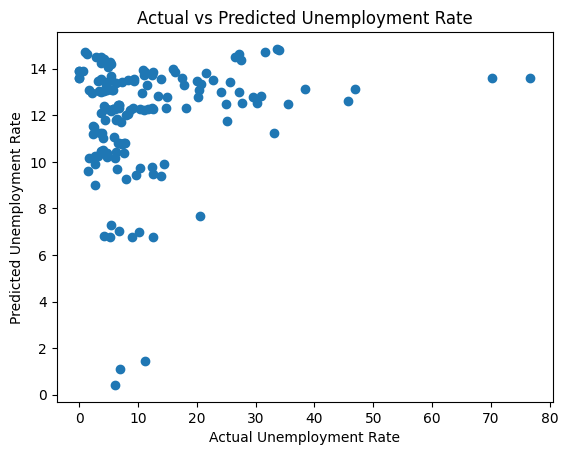

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Unemployment Rate")
plt.ylabel("Predicted Unemployment Rate")
plt.title("Actual vs Predicted Unemployment Rate")
plt.show()

In [40]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:")
print(coefficients)


Coefficients:
                            Coefficient
Employed                  -2.918449e-07
Labour Participation Rate  4.350554e-02
